In [14]:
import numpy as np 
import pandas as pd

In [15]:
df=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\linkedin-reviews.csv")

In [16]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


## Explorarory Data Analysis

## Explorarory Data Analysis

In [ ]:
we will start analyzing the distributions of rating . it will provide insight into the overall sentiment of the reviews. then we
can explore further , such as analyzing the length of reviews , and possibly derive insights from the text of the reviews .

## Plottting the  Distribution of Ratings

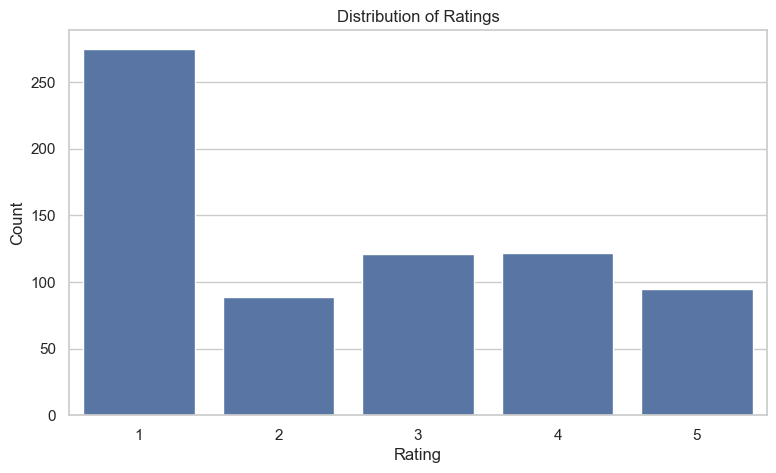

In [19]:
sns.set(style = "whitegrid")
plt.figure(figsize=(9,5))
sns.countplot(data = df, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [20]:
!pip install textblob



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from textblob import TextBlob


In [25]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return "Positive"

    elif sentiment.polarity < -0.1:
        return "Nagtive"

    else: 
        return "Neutral"
    


In [23]:
df['Sentiment'] =df['Review'].apply(textblob_sentiment_analysis)


In [24]:
df.sample(5)

,Review,Rating,Sentiment
151,Every action takes way too long to load. Worse...,2,Nagtive
58,Ok but needs an option to move to SD card,2,Positive
478,"Doesn't work at all on samsung galaxy s 2, pre...",1,Positive
428,"Great, I like it better on my phone than on my...",4,Positive
592,Avoid version 2! Everything that was good is n...,1,Positive


## Analyzing App Reviews Sentiments

In [26]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Positive    298
Neutral     297
Nagtive     107
Name: count, dtype: int64

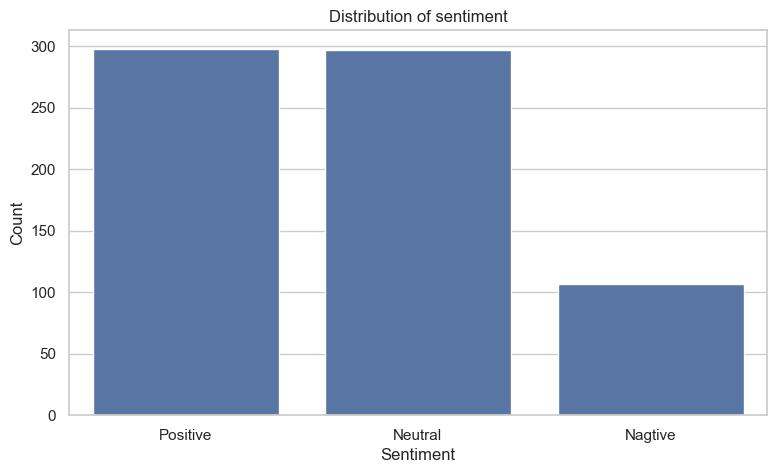

In [27]:
plt.figure(figsize = (9,5))
sns.barplot(x=sentiment_distribution.index,
            y=sentiment_distribution.values)
plt.title('Distribution of sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

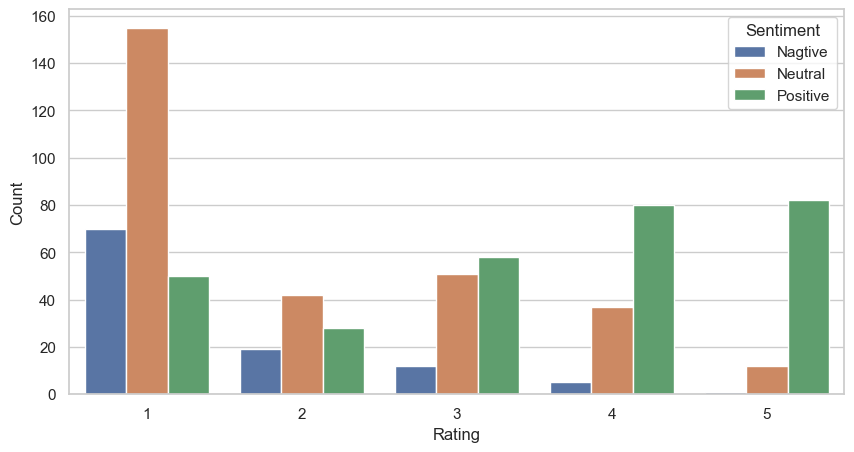

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,
              x='Rating',
              hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()